# Model vulnerability analysis

# scenario discovery

In [1]:
from ema_workbench.analysis import prim
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from ema_workbench import ema_logging, MultiprocessingEvaluator
from ema_workbench import Model, RealParameter, ScalarOutcome, CategoricalParameter, IntegerParameter, BooleanParameter
from ema_workbench.em_framework.samplers import sample_uncertainties
# from ema_workbench.em_framework.evaluators import MC
from dike_model_function import DikeNetwork
from problem_formulation import get_model_for_problem_formulation
ema_logging.log_to_stderr(ema_logging.INFO)

# dike_model, planning_steps = get_model_for_problem_formulation(5)

from ema_workbench.util.utilities import load_results

results = load_results('./martijnmc10pol1000scen.tar.gz')

C:\Users\teres\Anaconda3\lib\site-packages\ema_workbench\em_framework\evaluators.py:22: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  'ipyparallel not installed - IpyparalleEvaluator not available')
[MainProcess/INFO] results loaded succesfully from C:\Users\teres\Documents\EPA1361-Model-based Decison Making\EPA1361\final assignment\martijnmc10pol1000scen.tar.gz


In [10]:
# do something with the results to make them applicable (maybe)
experiments, outcomes = results

x = experiments
y = outcomes # or all, or some other specific.

In [7]:
x.head(5)

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,48.0,188.292656,10.0,0.919175,285.899843,1.5,0.013483,198.974353,1.5,0.423934,...,4.0,5.0,9.0,1.0,10.0,10.0,2.0,0,0,dikesnet
1,63.0,212.679167,1.0,0.177899,298.185526,10.0,0.942886,123.165919,10.0,0.873936,...,4.0,5.0,9.0,1.0,10.0,10.0,2.0,1,0,dikesnet
2,11.0,97.453467,1.0,0.189545,333.759324,1.0,0.567906,327.617806,1.0,0.273239,...,4.0,5.0,9.0,1.0,10.0,10.0,2.0,2,0,dikesnet
3,114.0,81.908208,1.0,0.859194,57.641979,10.0,0.417337,190.770156,10.0,0.687790,...,4.0,5.0,9.0,1.0,10.0,10.0,2.0,3,0,dikesnet
4,123.0,66.741443,1.5,0.929071,290.443386,1.0,0.320991,232.021677,1.5,0.456173,...,4.0,5.0,9.0,1.0,10.0,10.0,2.0,4,0,dikesnet


In [3]:
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()

plt.show

TypeError: unhashable type: 'dict'

In [ ]:
box1.inspect_tradeoff()

In [ ]:
# select any to inspect (currently 21)
box1.inspect(21)
box1.inspect(21, style='graph')

plt.show()

In [ ]:
box1.select(21)
fig = box1.show_pairs_scatter()
plt.show()

In [ ]:
# drop some variable and reinspect
box1.drop_restriction('Cellulosic cost')
box1.inspect(style='graph')
plt.show()

# subspace partitioning

In [29]:
x0 = experiments.drop(['scenario','policy'], axis = 1, inplace = False)

In [30]:
# Merge some outcomes for easy plotting
data = pd.DataFrame.from_dict(outcomes)

dam_list = data.filter(like='Damage').columns
# print(data.filter(like='Damage').columns)
data['total-damage'] = data[dam_list].sum(axis=1)
data.drop(columns=dam_list, inplace=True)
death_list = data.filter(like='Deaths').columns
data['total-death'] = data[death_list].sum(axis=1)
data.drop(columns=death_list, inplace=True)
invest_list = data.filter(like='Investment').columns
data['total-RaisingDike-cost'] = data[invest_list].sum(axis=1)
data.drop(columns=invest_list, inplace=True)
rfr_list = data.filter(like='RfR').columns
data['total-RfR-cost'] = data[rfr_list].sum(axis=1)
data.drop(columns=rfr_list, inplace=True)
evac_list = data.filter(like='Evacuation').columns
data['total-evacuation-cost'] = data[evac_list].sum(axis=1)
data.drop(columns=evac_list, inplace=True)

In [40]:
data['TotalCost'] = data['total-RaisingDike-cost'] + data['total-RfR-cost'] + data['total-evacuation-cost']

In [41]:
y0 = data

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


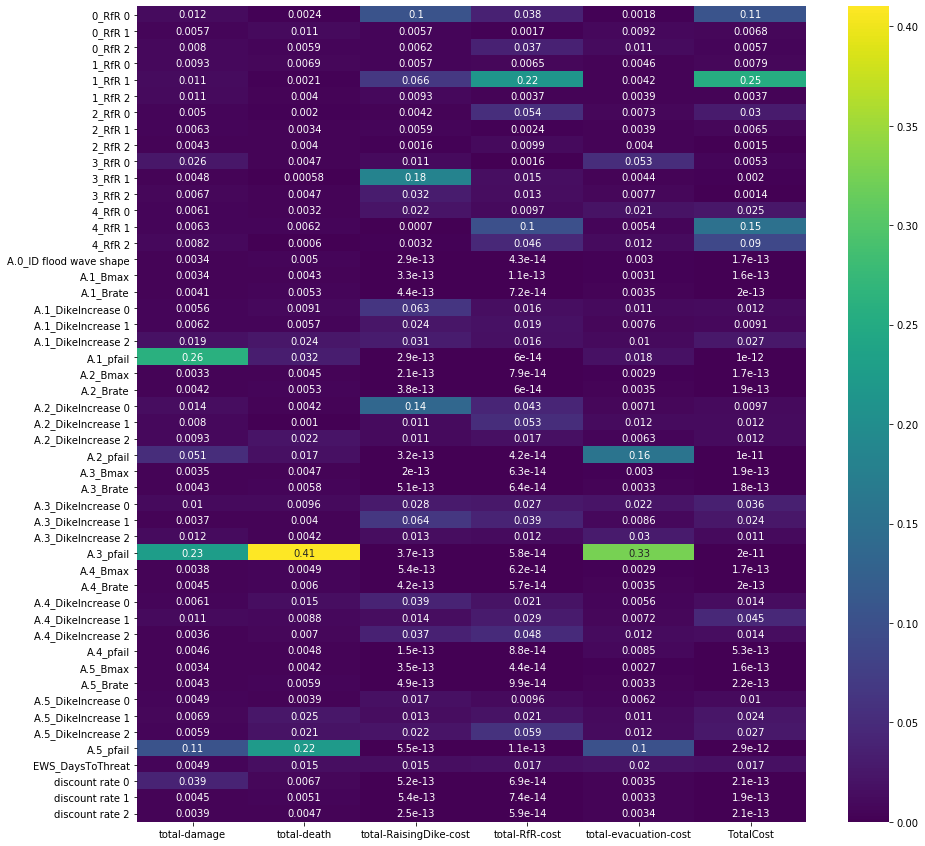

In [43]:
# from ema_workbench.analysis import feature_scoring
import seaborn as sns


fs = feature_scoring.get_feature_scores_all(x0, y0)
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()

* The total damage is related to the dike failure probabilities, especially for A1 and A3.
* Regarding the casualties, it is highly determined by the dike fail probability of A3 and A5. 
* RfR at the beginning for location 1 (dike ring 2 ) would influence most of the total cost


In [44]:
fig.savefig('FeatureScoring.png')

# sensitivity analysis 

Sobol

In [ ]:
from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

with SequentialEvaluator(py_model) as evaluator:
    sa_results = evaluator.perform_experiments(scenarios = 50 ,
                                               uncertainty_sampling='sobol')

In [1]:
experiments, outcomes = sa_results
outcomes = {key:outcomes[key][:,0,:] for key in outcomes.keys()}

NameError: name 'sa_results' is not defined

In [ ]:
problem = get_SALib_problem(py_model.uncertainties)

In [ ]:
Si = sobol.analyze(problem, outcomes['prey'][:,-1],
                   calc_second_order=True, print_to_console=False)

In [ ]:
Si_filter = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter, index = problem['names'])
Si_df

extra trees

In [ ]:
extra_trees_results = sa_results_1

tree_experiments, tree_outcomes = extra_trees_results
tree_outcomes = {key:tree_outcomes[key][:,0, -1] for key in tree_outcomes.keys()} # Important for printing, delete redundant array
tree_experiments = tree_experiments.drop(columns=['scenario', 'policy', 'model'], inplace=False)
print(tree_experiments.head(5))

from ema_workbench.analysis import feature_scoring
from ema_workbench import ema_logging

ema_logging.log_to_stderr(ema_logging.INFO)

score = feature_scoring.get_feature_scores_all(tree_experiments, tree_outcomes)
sns.heatmap(score, annot=True)
plt.show()

sobol vs. extra trees

In [ ]:
scores, p_values = feature_scoring.get_rf_feature_scores(tree_experiments,tree_outcomes['prey'],  mode=RuleInductionType.REGRESSION, 
                                                         nr_trees=100, max_features=0.6)
scores

In [2]:
Si_df_1['ST']

NameError: name 'Si_df_1' is not defined